In [1]:
import pickle

import matplotlib
matplotlib.use('Agg')
import os
import datetime
import numpy as np
import dill as pickle
import random
import sys
np.random.seed(0)
random.seed(0)
now = datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S")
workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)
#print(os.getcwd())
from codes.experimentclasses.RigidEthanolPCA import RigidEthanolPCA
from codes.otherfunctions.multirun import get_coeffs_reps_tangent
from codes.otherfunctions.multirun import get_grads_reps_pca2_tangent
from codes.otherfunctions.multiplot import plot_reg_path_ax_lambdasearch_tangent
from codes.otherfunctions.get_dictionaries import get_atoms_4
from codes.flasso.Replicate import Replicate
from codes.otherfunctions.get_grads_tangent import get_grads_tangent
from codes.otherfunctions.multirun import get_support_recovery_lambda
from codes.otherfunctions.multirun import get_lower_interesting_lambda
import matplotlib.pyplot as plt
from codes.otherfunctions.multirun import get_coeffs_and_lambdas
from codes.geometer.RiemannianManifold import RiemannianManifold
from collections import Counter

/Users/samsonkoelle/manifoldflasso_jmlr


In [2]:
with open('/Users/samsonkoelle/manifoldflasso_jmlr/Figures/ethanol/May_29_2020_12_06_42/replicatesethanol_052820.pkl' ,
         'rb') as loader:
     replicates = pickle.load(loader)

In [3]:
replicates[0].coeffs

array([[[[-1.25066316,  1.40601087,  1.0099082 , ...,  3.87981129,
          -3.16007257, -3.93397665],
         [ 0.77529615,  0.58374649, -0.98697579, ..., -1.38022888,
           1.15038276, -1.46563399],
         [ 1.7575413 ,  1.58030176, -1.40213406, ...,  1.38505042,
          -1.39903653,  1.44461226],
         ...,
         [ 2.67711496,  2.79365897, -2.47819424, ...,  2.58591819,
           2.91482401, -3.13637543],
         [ 1.87872851,  0.14377905, -0.46166503, ...,  4.73174906,
          -2.1392715 , -0.84031653],
         [-1.48270941, -0.97952729,  1.18113375, ...,  2.68254495,
          -2.27671409,  2.49997592]],

        [[ 5.9795742 , -8.38810635, -8.18472195, ..., -1.71185529,
          -0.7977376 , -0.19282776],
         [ 2.80047154,  3.03648686, -1.59906614, ...,  3.39552331,
          -3.11416793,  3.96408939],
         [ 0.71659184,  0.32774386, -0.36702591, ..., -2.84001184,
           2.53399444, -2.71554017],
         ...,
         [ 0.83828717,  1.28032494

In [6]:

#set parameters
n = 50000 #number of data points to simulate
nsel = 50 #number of points to analyze with lasso
itermax = 1000 #maximum iterations per lasso run
tol = 1e-10 #convergence criteria for lasso
#lambdas = np.asarray([5,10,15,20,25,50,75,100], dtype = np.float16)#lambda values for lasso
#lambdas = np.asarray([0,2.95339658e-06, 5.90679317e-06, 8.86018975e-06, 1.18135863e-05,
#       1.47669829e-05, 2.95339658e-05, 4.43009487e-05, 5.90679317e-05])
#lambdas = np.asarray([0,.001,.01,.1,1,10], dtype = np.float16)
lambdas = np.asarray(np.hstack([np.asarray([0]),np.logspace(-3,-1,11)]), dtype = np.float16)
#lambdas = np.asarray([0,1,2,3,4,5,6,7,8,9,10], dtype = np.float16)
n_neighbors = 100
n_components = 3 #number of embedding dimensions (diffusion maps)
diffusion_time = .50 #diffusion time controls gaussian kernel radius per gradients paper
dim = 2 #manifold dimension
dimnoise = 2 #noise dimension
cores = 16 #number of cores for parallel processing
ii = np.asarray([0,0,0,0,1,1,1,2]) # atom adjacencies for dihedral angle computation
jj = np.asarray([1,2,3,4,5,6,7,8])
#run experiment
#atoms4 = np.asarray([[9,0,1,2],[0,1,2,3],[1,2,3,4],[2,3,4,5],[3,4,5,6],[4,5,6,1],[5,6,1,0]],dtype = int)
atoms4 = np.asarray([[6,1,0,4],[4,0,2,8],[7,6,5,1],[3,0,2,4]],dtype = int)
#folder = workingdirectory + '/Figures/ethanol/' + now
#os.mkdir(folder)
new_MN = False
new_grad = True
savename = 'ethanol_052820'
savefolder = 'ethanol'
loadfolder = 'ethanol'
loadname = 'ethanol_052820'
nreps = 25
atoms4,p = get_atoms_4(9,ii,jj)

In [44]:
cor = 0.
var = 0.
experiment = RigidEthanolPCA(dim, cor,var,ii,jj, cores, False, atoms4)

In [33]:
from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d
supports = {}
for i in range(nreps):
    print(i)
    supports[i] = get_support(replicates[i].coeffs, dim)
#fig, ax = plt.figure(figsize=(15 , 15 ))
#plot_support_2d(supports, experiment.p)
#fig.savefig(folder + '/flasso_support')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [ ]:
plot_support_2d

In [2]:
plot_support_2d(supports, 12)

NameError: name 'supports' is not defined

In [34]:
supports

{0: array([0, 9]),
 1: array([ 9, 11]),
 2: array([0, 9]),
 3: array([ 9, 11]),
 4: array([ 9, 10]),
 5: nan,
 6: nan,
 7: array([6, 9]),
 8: array([ 9, 10]),
 9: array([ 9, 11]),
 10: nan,
 11: array([10, 11]),
 12: array([8, 9]),
 13: array([ 9, 11]),
 14: array([ 9, 11]),
 15: array([ 9, 11]),
 16: array([0, 9]),
 17: array([ 9, 10]),
 18: array([6, 9]),
 19: array([5, 9]),
 20: array([ 9, 10]),
 21: array([10, 11]),
 22: array([7, 9]),
 23: array([10, 11]),
 24: array([ 9, 11])}

In [36]:
atoms4

array([[2, 0, 1, 5],
       [3, 0, 1, 5],
       [4, 0, 1, 5],
       [2, 0, 1, 6],
       [3, 0, 1, 6],
       [4, 0, 1, 6],
       [2, 0, 1, 7],
       [3, 0, 1, 7],
       [4, 0, 1, 7],
       [1, 0, 2, 8],
       [3, 0, 2, 8],
       [4, 0, 2, 8]])

In [20]:
coeffs = replicates[i].coeffs


In [21]:
selected_functions = np.asarray(np.where(np.sum(np.sum(coeffs ** 2, axis=1), axis=1) > 0))

In [22]:
selected_functions

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
         8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
        12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14,
        14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,
        16, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
        19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21,
        21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24,
        25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27],
       

array([], dtype=int64)

In [24]:
sls = np.where(np.asarray(list(Counter(selected_functions[0]).values())) == dim)[0]
if len(sls) > 0:
    selection_lambda = np.min(sls)

ValueError: zero-size array to reduction operation minimum which has no identity

In [16]:
selection_lambda

14

In [17]:
    selected_functions_at_selection_lambda = selected_functions[1][
        np.where(selected_functions[0] == selection_lambda)[0]]

In [18]:
selected_functions_at_selection_lambda

array([0, 9])

In [2]:

def get_support(coeffs, dim):
    selected_functions = np.asarray(np.where(np.sum(np.sum(coeffs ** 2, axis=1), axis=1) > 0))

    sls = np.where(np.asarray(list(Counter(selected_functions[0]).values())) == dim)[0]
    if len(sls) > 0:
        selection_lambda = np.min(sls)
        selected_functions_at_selection_lambda = selected_functions[1][
            np.where(selected_functions[0] == selection_lambda)[0]]

        return (selected_functions_at_selection_lambda)
    else:
        return(np.nan)


In [3]:
with open('/Users/samsonkoelle/manifoldflasso_jmlr/Figures/rigidethanol/May_29_2020_20_24_18n10000nsel50nreps25/replicatesrigidethanol_032520.pkl' ,
         'rb') as loader:
     replicates = pickle.load(loader)

In [9]:
nreps = 25
supports = {}
for i in range(nreps):
    print(i)
    supports[i] = get_support(replicates[i].coeffs, dim)
#fig, ax = plt.figure(figsize=(15 , 15 ))
#plot_support_2d(supports, experiment.p)
#fig.savefig(folder + '/flasso_support')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [42]:
replicates[0].coeffs.shape

(18, 2, 50, 12)

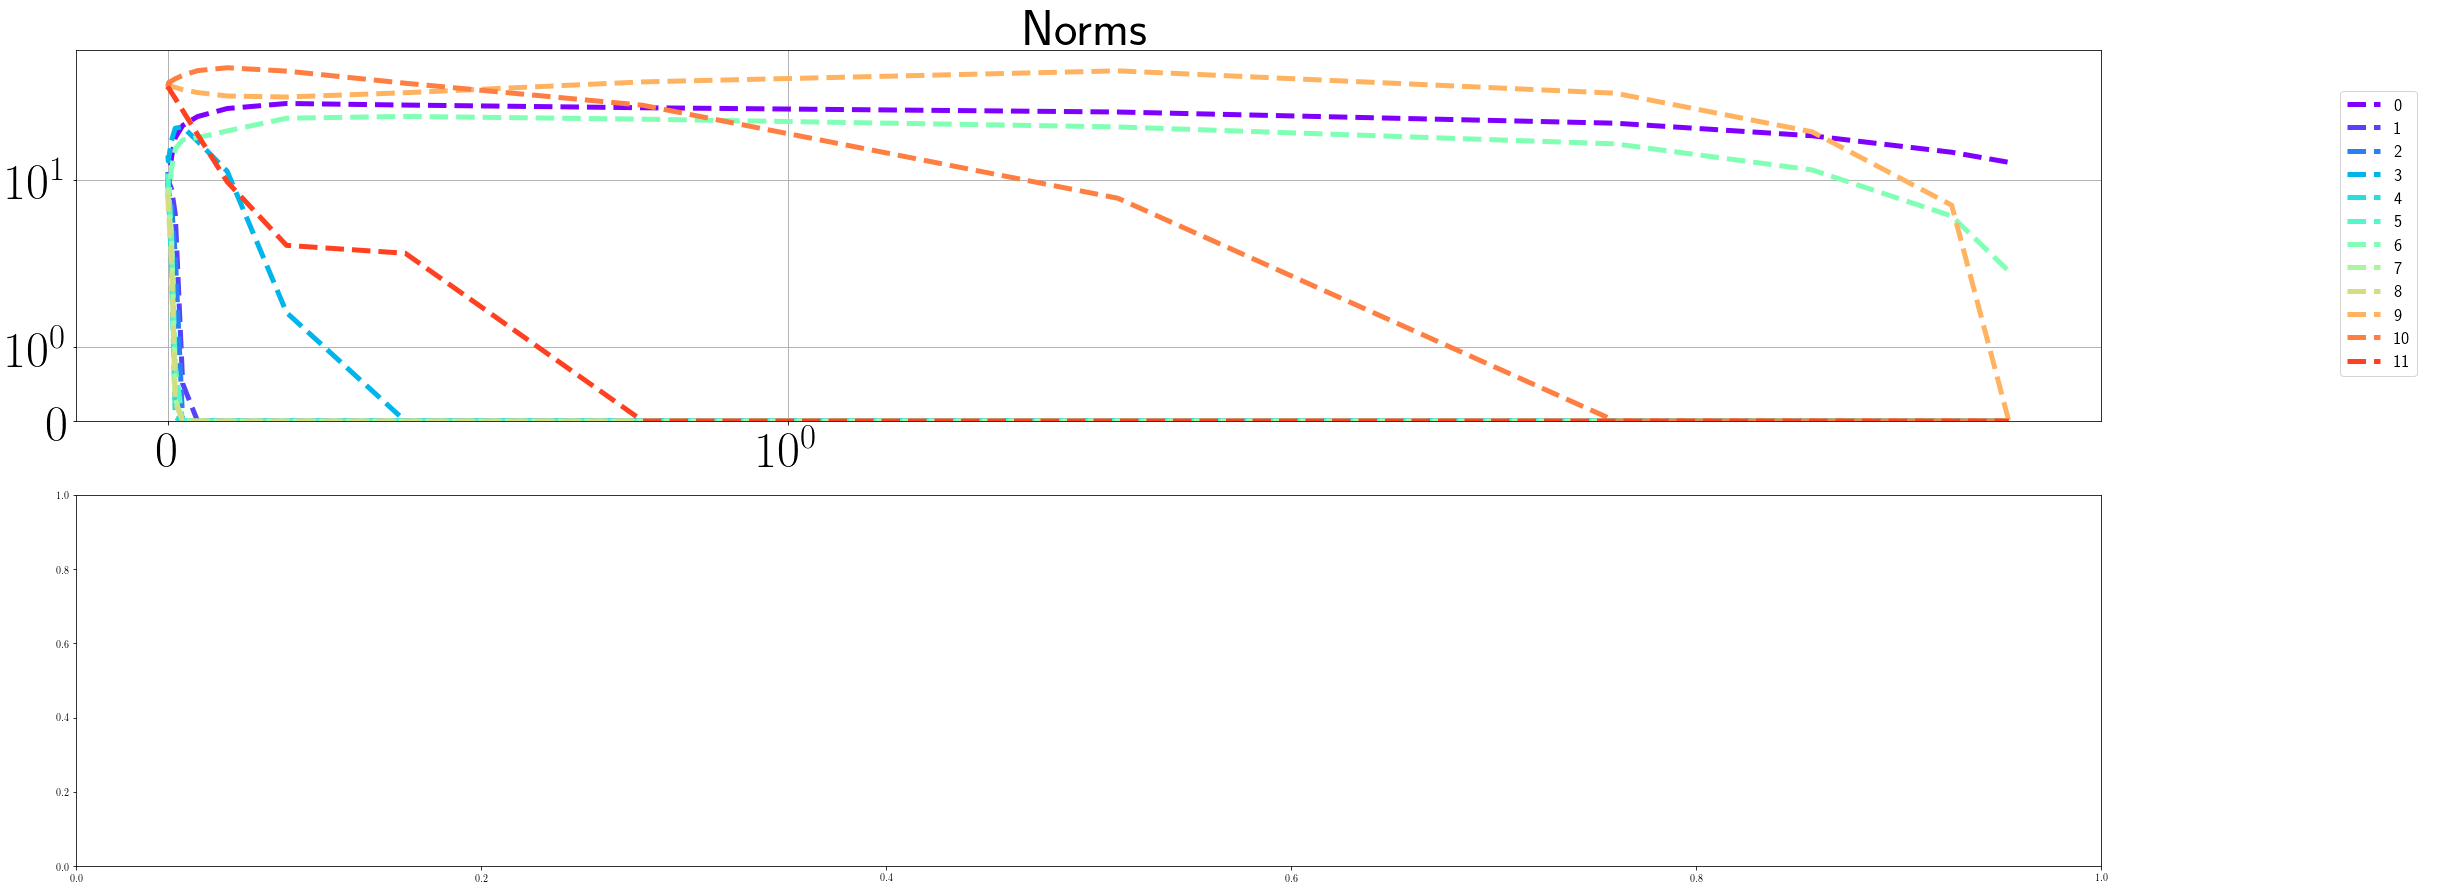

In [13]:
%matplotlib inline
m = 3
fig, axes_all = plt.subplots(2, 1,figsize=(15 * m, 15))
for i in range(1):
    plot_reg_path_ax_lambdasearch_tangent(axes_all[i], replicates[i].coeffs, replicates[i].lambdas_plot * np.sqrt(m * nsel), fig)
#fig.savefig(folder + '/beta_paths')for i in range(nreps):
#    replicates[i].coeffs, replicates[i].lambdas_plot = get_coeffs_and_lambdas(replicates[i].coeff_dict, replicates[i].lower_lambda, replicates[i].higher_lambda)
#    plot_reg_path_ax_lambdasearch_tangent(axes_all[i], replicates[i].coeffs, replicates[i].lambdas_plot * np.sqrt(m * nsel), fig)
#fig.savefig(folder + '/beta_paths')

In [17]:
np.linalg.norm(replicates[0].dg_M[:,6,:])

0.7268347040413705

In [18]:
np.linalg.norm(replicates[0].dg_M[:,9,:])

0.559756469966718

In [19]:
np.linalg.norm(replicates[0].dg_M[:,0,:])

0.7302463203516844

In [20]:
ols_norm, supports_brute = get_olsnorm_and_supportsbrute(experiment,replicates)

NameError: name 'get_olsnorm_and_supportsbrute' is not defined

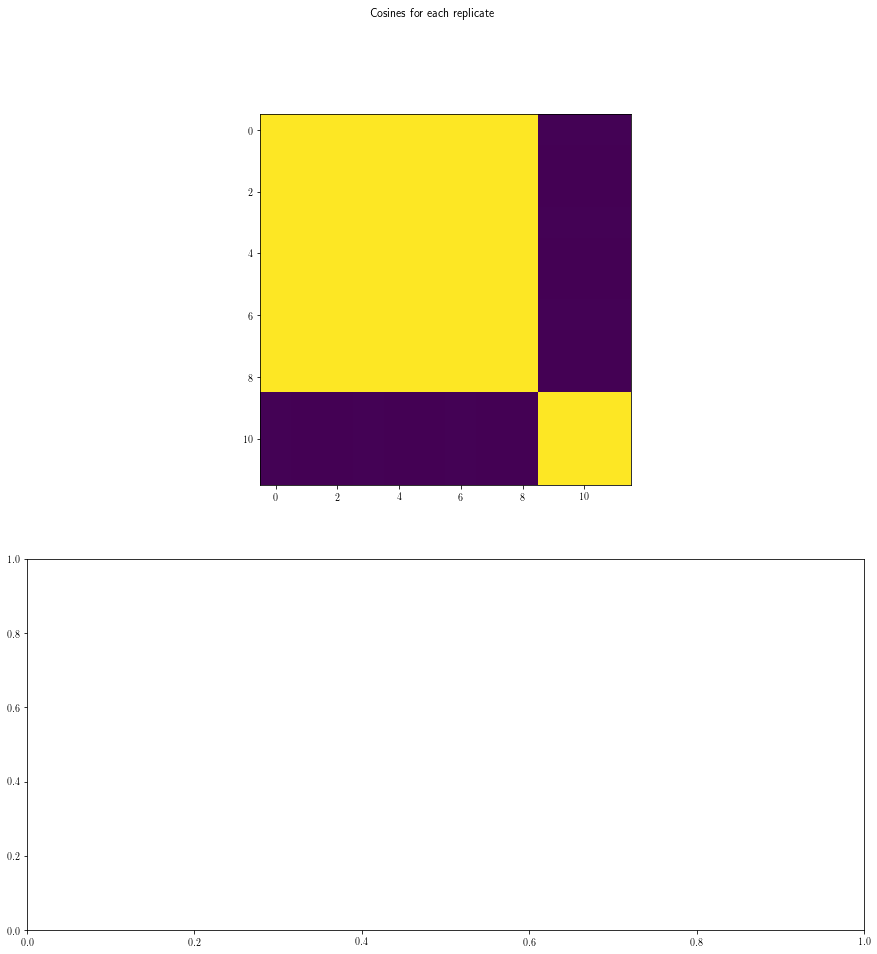

In [25]:
from codes.otherfunctions.multirun import get_cosines
fig, axes_all = plt.subplots(2,figsize=(15,15))
fig.suptitle('Cosines for each replicate')
for i in range(1):
    #full = np.concatenate([replicates[i].dg_M, np.swapaxes(replicates[i].df_M,1,2)],1)
    asdf = get_cosines(replicates[i].dg_M)
    axes_all[i].imshow(asdf)
#fig.savefig(folder + '/cosines')

In [27]:
    coeffs = replicates[0].coeffs
    selected_functions = np.asarray(np.where(np.sum(np.sum(coeffs ** 2, axis=1), axis=1) > 0))

    sls = np.where(np.asarray(list(Counter(selected_functions[0]).values())) == dim)[0]
    if len(sls) > 0:
        selection_lambda = np.min(sls)
        selected_functions_at_selection_lambda = selected_functions[1][
            np.where(selected_functions[0] == selection_lambda)[0]]


In [28]:
selection_lambda

17

In [36]:
r.lambdas_plot[17]

0.5625

In [39]:
np.linalg.norm(r.dg_M[:,6,:], axis = 1).max()

0.11633912170063156

In [40]:
np.linalg.norm(r.dg_M[:,9,:], axis = 1).max()

0.12867839374289203

In [55]:
r = replicates[0]
cs = experiment.get_betas_spam2(r.xtrain, r.ytrain, r.groups, np.asarray([r.lambdas_plot[17]]), 50, 2, itermax, tol)


In [61]:
np.linalg.norm(np.linalg.norm(cs[0], axis = 1)**2, axis = 0)**2

array([1.68059217e+04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.12965240e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [62]:
r.dg_M[:,0]

array([[-0.10665332, -0.01180447],
       [-0.08228655,  0.00085667],
       [ 0.00313987, -0.11257552],
       [-0.09909808,  0.02560357],
       [-0.08935135, -0.01136361],
       [ 0.01668049,  0.10776254],
       [-0.10421755,  0.00858113],
       [ 0.01724142,  0.0726326 ],
       [-0.10028624,  0.0197924 ],
       [-0.0103932 , -0.11030472],
       [-0.02477746, -0.10096071],
       [-0.06941629, -0.07882469],
       [-0.10546886,  0.00752466],
       [ 0.10599768, -0.01306598],
       [-0.02150603,  0.10254712],
       [-0.00407269, -0.10314099],
       [ 0.00018937,  0.10486732],
       [ 0.10257452, -0.00849867],
       [ 0.00067932,  0.10752242],
       [ 0.01094446,  0.09229876],
       [-0.10645279,  0.01290423],
       [-0.10250349, -0.00975837],
       [ 0.10651914,  0.00813855],
       [-0.10910769, -0.01979531],
       [-0.01255141,  0.09688344],
       [ 0.04435332,  0.09540666],
       [ 0.10486064, -0.01370722],
       [-0.11203825,  0.01307321],
       [ 0.00106189,

In [64]:
r.dg_M[:,9]

array([[-3.78439486e-04,  8.43151657e-02],
       [-5.80346570e-03,  8.05949209e-02],
       [-5.08227781e-02, -1.65166190e-03],
       [ 1.10342375e-02,  5.04195559e-02],
       [-4.71975888e-03,  9.33758115e-02],
       [-5.15556119e-02,  7.51593770e-03],
       [-1.46251199e-03,  1.17653970e-01],
       [-5.03379819e-02,  1.26762751e-02],
       [ 4.88124045e-03,  1.14172451e-01],
       [-5.04996573e-02,  4.50148649e-03],
       [-5.18146424e-02,  1.39741764e-02],
       [-5.23051806e-02,  4.12826386e-02],
       [-1.15436468e-02,  1.11333641e-01],
       [-1.94660670e-03,  1.20739374e-01],
       [-5.13430181e-02, -1.20934392e-02],
       [-5.41698856e-02,  4.19553437e-03],
       [-6.28962994e-02,  2.99067756e-03],
       [-1.48767988e-03,  8.42971218e-02],
       [-5.68519471e-02,  2.31983407e-03],
       [-6.10797971e-02,  1.75555938e-03],
       [-3.78715524e-04,  1.28677836e-01],
       [ 1.61261804e-03,  8.83930927e-02],
       [ 3.53967734e-03,  1.21316581e-01],
       [-7.

In [66]:
np.linalg.norm(r.dg_w_pca[:,6,:], axis = 1)

array([0.52782913, 0.53210821, 0.5414781 , 0.50926446, 0.55135858,
       0.52972255, 0.51408722, 0.52701173, 0.50954368, 0.50929584,
       0.51482889, 0.5754407 , 0.5213671 , 0.51873982, 0.60789509,
       0.59733319, 0.50894721, 0.60334436, 0.51058274, 0.52095814,
       0.61552618, 0.60944343, 0.61392074, 0.52559068, 0.52168234,
       0.60274979, 0.57765803, 0.54300325, 0.51181382, 0.51364222,
       0.51332384, 0.55577696, 0.52579979, 0.50041897, 0.51158086,
       0.51542775, 0.51845424, 0.5972814 , 0.50384413, 0.51750678,
       0.54187192, 0.52005157, 0.51204143, 0.52965949, 0.52243245,
       0.52608163, 0.51068261, 0.50297622, 0.56657853, 0.50698003])

In [67]:
np.linalg.norm(r.dg_w_pca[:,9,:], axis = 1)

array([2.54415722, 2.53539198, 0.47940482, 0.48997332, 0.95873234,
       0.49094169, 1.30978965, 0.49089529, 2.01826821, 0.47786481,
       0.50658879, 0.63420858, 2.11772702, 2.13820229, 0.49741347,
       0.51436694, 0.59822648, 0.82204827, 0.53788229, 0.58538064,
       1.67684186, 2.57745695, 1.3507313 , 0.92438106, 0.47920728,
       0.53885908, 2.06286072, 0.77044597, 0.48572377, 0.51606961,
       1.61462004, 0.50448761, 2.86438997, 0.75790408, 0.55853108,
       0.63285334, 0.4777907 , 0.55506813, 0.76054617, 2.63192732,
       0.55473322, 0.48294856, 1.64309131, 0.57397297, 2.63757865,
       2.06189867, 0.48198988, 0.75990862, 0.95851848, 0.51589457])

In [70]:
np.linalg.norm(r.dgw_norm[:,9,:], axis = 1)

array([0.27143051, 0.27049537, 0.05114664, 0.05227417, 0.10228503,
       0.05237748, 0.13973856, 0.05237253, 0.21532458, 0.05098234,
       0.05404684, 0.06766231, 0.22593562, 0.22812008, 0.05306794,
       0.05487667, 0.06382346, 0.08770251, 0.05738547, 0.06245297,
       0.17889855, 0.27498319, 0.14410654, 0.09862017, 0.05112557,
       0.05748968, 0.22008205, 0.08219718, 0.0518208 , 0.05505833,
       0.17226024, 0.05382267, 0.30559544, 0.08085911, 0.05958845,
       0.06751772, 0.05097443, 0.05921899, 0.08114099, 0.28079451,
       0.05918326, 0.05152471, 0.17529778, 0.06123591, 0.28139744,
       0.21997941, 0.05142244, 0.08107297, 0.10226222, 0.05503965])

In [71]:
np.linalg.norm(r.dgw_norm[:,6,:], axis = 1)

array([0.13864373, 0.13976771, 0.14222888, 0.13376739, 0.14482416,
       0.13914107, 0.13503418, 0.13842903, 0.13384073, 0.13377564,
       0.13522899, 0.15114976, 0.13694637, 0.13625626, 0.15967449,
       0.15690021, 0.13368406, 0.15847916, 0.13411366, 0.13683895,
       0.16167893, 0.16008119, 0.16125723, 0.13805577, 0.13702917,
       0.15832298, 0.15173218, 0.14262949, 0.13443703, 0.13491729,
       0.13483366, 0.14598473, 0.13811069, 0.13144397, 0.13437584,
       0.13538629, 0.13618125, 0.15688661, 0.13234365, 0.13593238,
       0.14233232, 0.13660082, 0.13449681, 0.13912451, 0.1372262 ,
       0.13818472, 0.1341399 , 0.13211567, 0.14882196, 0.13316735])

In [ ]:
r.ta